### Testing 3T27T Queue 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [65]:
import radio as rio
from radio.data.datautils import get_first_batch 
from radio.data.datavisualization import plot_batch, plot_grid

#### Setup Data

In [57]:
# Load pre-stored data from train/test/val folders 
data = rio.data.MRI3T27TPatchDataModule(
    root="/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies",
    study="MRI3T27T",
    subj_dir="unprocessed",
    data_dir="",
    domain_a="3T_MPR",
    domain_b="7T_MPR",
    use_augmentation=False,
    use_preprocessing=True,
    resample=False,
    batch_size=16,
    dims=(368, 480, 384),
    patch_size=(368, 480, 1),
    create_custom_probability_map=True,
    queue_max_length=10,
    samples_per_volume=1,
)
data.prepare_data()
data.setup(stage='fit')

In [58]:
print(f"Training: {data.size_train} patches.")
print(f"Validation: {data.size_val} patches.")

Training: 890 patches.
Validation: 222 patches.


#### Get a Train and a Test Batch

In [59]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()

In [60]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
val_batch = get_first_batch(val_dataloader)

In [64]:
train_batch_a, train_batch_b = train_batch
print(f"Batch Domain A Keys: {train_batch_a.keys()}")
print(f"Domain A Sample Shape: {train_batch_a['mri']['data'].shape}")
print(f"Batch Domain B Keys: {train_batch_b.keys()}")
print(f"Domain B Sample Shape: {train_batch_b['mri']['data'].shape}")

Batch Domain A Keys: dict_keys(['mri', 'sampling_map', 'location'])
Domain A Sample Shape: torch.Size([16, 1, 368, 480, 1])
Batch Domain B Keys: dict_keys(['mri', 'sampling_map', 'location'])
Domain B Sample Shape: torch.Size([16, 1, 368, 480, 1])


#### Plot Example Samples from Batches

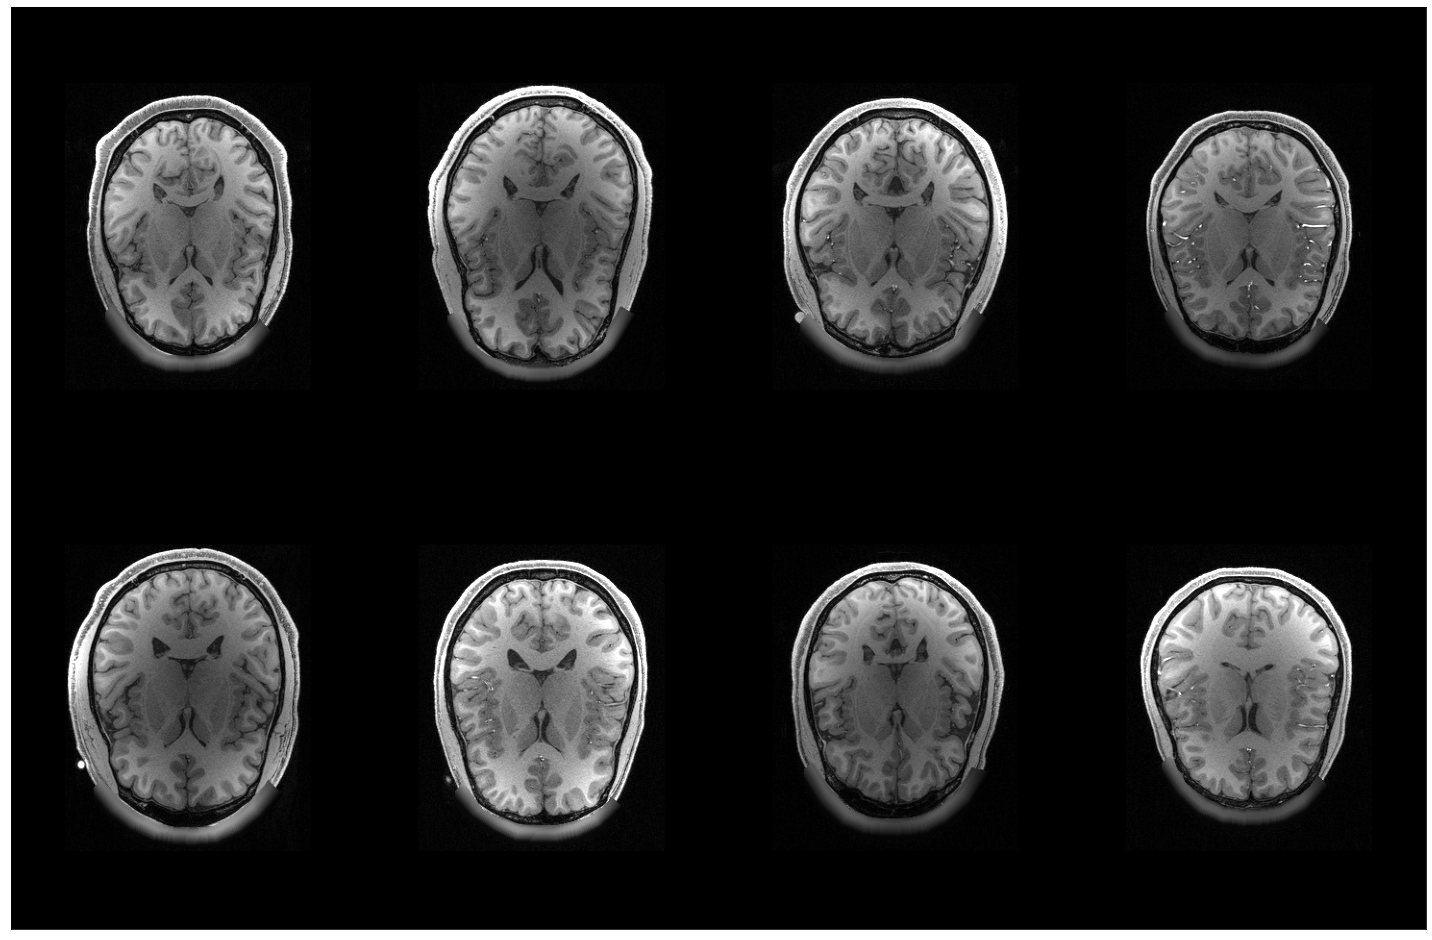

In [62]:
plot_grid(train_batch_a)

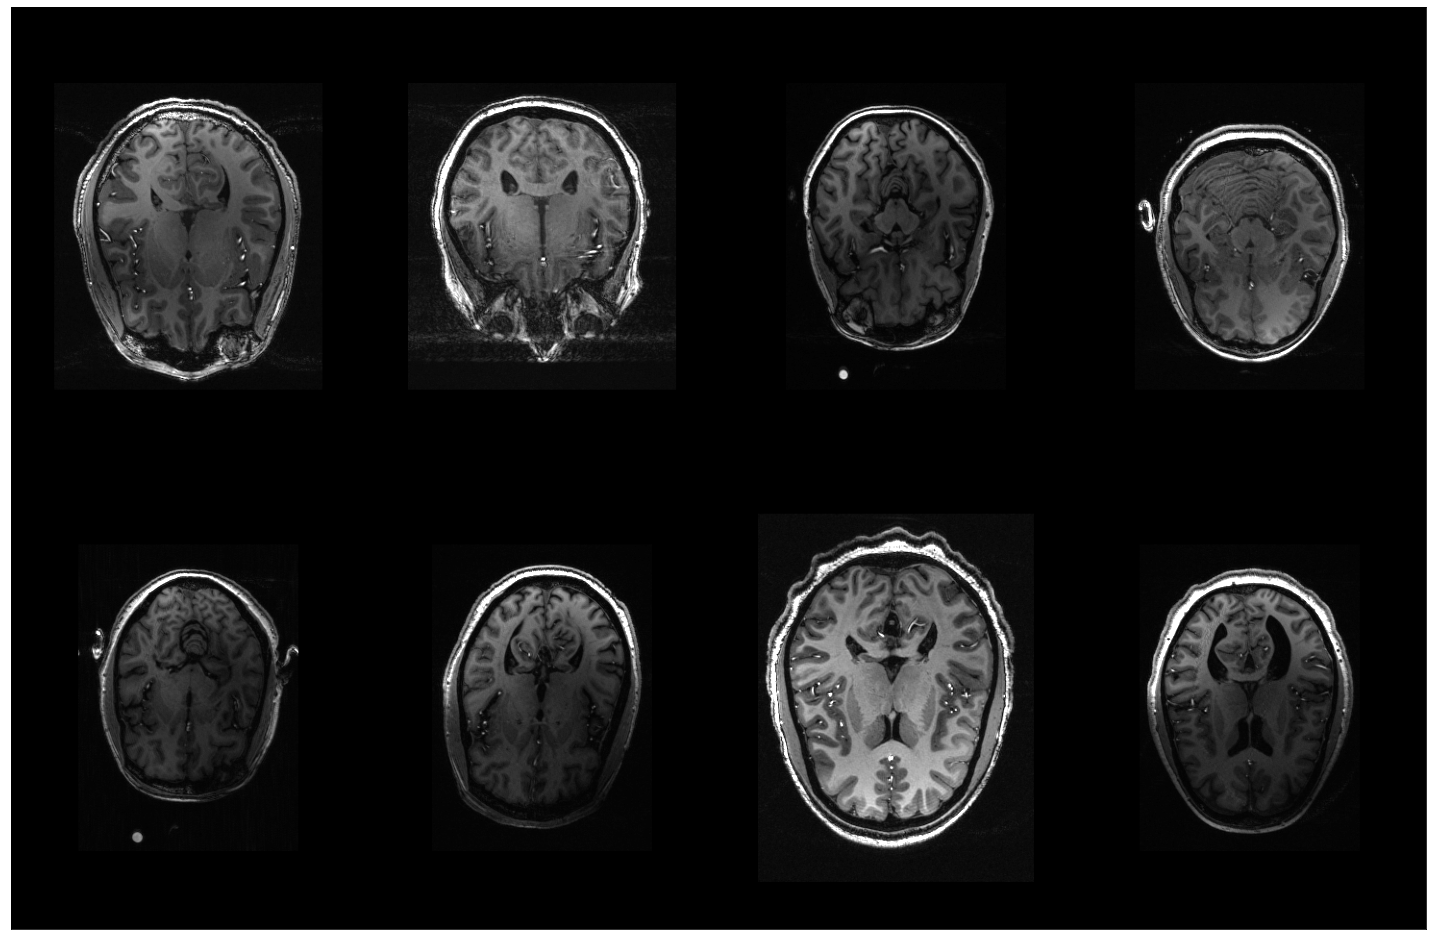

In [63]:
plot_grid(train_batch_b)